In [ ]:
from fastai import *
from fastai.text import *
import spacy
from spacy.symbols import ORTH
import string

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'xxxemoji', text)

def remove_all_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)

def remove_hashtag(text):
    hasht=re.compile(r'#')
    return hasht.sub('xxxhash_',text)

def remove_underscore(text):
    at=re.compile('_')
    return ' '.join(at.split(text))

def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'xxxuser',text)

def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'_xxxnumber_', text)

def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'xxxurl',text)

def remove_repeat_punct(text):
    def _replace_rep_punct(m):
        c,cc = m.groups()
        return f' xxxrepeat {c}' 
    rep = re.compile(r'([!?.])(\1{2,})')
    return rep.sub(_replace_rep_punct, text)

def remove_elongated_words(text):
    rep = re.compile(r'\b(\S*?)([a-z])\2{2,}\b')
    return rep.sub(r'\1\2 xxxelong', text)


def remove_not_ASCII(text):
     text = ''.join([word for word in text if word in string.printable])
     return text


def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'xxxsmile', text)


def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'xxxsadface', text)

def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'xxxheart', text)

def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    # text = remove_not_ASCII(text)
    
    # Lower text, replace abbreviations
    # text = text.lower()
    # text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_hashtag(text)
    text = remove_number(text)
    text=  remove_underscore(text)

    
    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
    text = remove_repeat_punct(text)
    text = remove_all_punct(text)
    text = remove_elongated_words(text)



    return text


In [ ]:
clean_tweet("@user Hello there!!! :(  ^^^-->")

'xxxuser Hello there xxxrepeat  xxxsadface  '

In [ ]:
spl_token_list=['xxxurl','xxxuser','xxxhash','xxxnumber','xxxemoji','xxxsmile','xxxsadface','xxxheart','xxxelong','xxxrepeat']+[UNK,PAD,BOS,EOS,FLD,TK_MAJ,TK_UP,TK_REP,TK_WREP]

In [ ]:
replace_rep("Helooooo!!!")

'Hel xxrep 5 o !!!'

In [ ]:
remove_repeat_punct(remove_elongated_words("Heloooooo!!!"))

'Helo xxxelong xxxrepeat !'

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"prabuj99","key":"df2793c538a8dbcea96007c2b48f4c9e"}'}

In [ ]:
! mkdir  ~/.kaggle/
! mv kaggle.json ~/.kaggle/

In [ ]:
base_dir='/content/drive/My Drive/Colab Notebooks/Sentiment140'
root =Path(base_dir)
# root.mkdir(parents=True,exist_ok=True)

data_dir=Path(root/'data')
# data_dir.mkdir(parents=True,exist_ok=True)

model_dir=Path(root/'models')
# model_dir.mkdir(parents=True,exist_ok=True)

In [ ]:
! unzip -q -n sentiment140.zip

In [ ]:
train=pd.read_csv('training140.csv',encoding='ISO-8859-1',names=["target", "ids", "date", "flag", "user", "text"])

In [ ]:
train.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
train.to_csv(data_dir/'train140.csv',index=False)

In [ ]:
train=pd.read_csv(data_dir/'train140.csv')


In [ ]:
train.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
train_lm=train.drop(['target','date','flag','user'],axis=1)

In [ ]:
train_lm['text']=train_lm['text'].apply(clean_tweet)

In [ ]:
train_lm.head()

,ids,text
0,1467810369,xxxuser xxxurl Aw xxxelong thats a bummer Yo...
1,1467810672,is upset that he cant update his Facebook by t...
2,1467810917,xxxuser I dived many times for the ball Manage...
3,1467811184,my whole body feels itchy and like its on fire
4,1467811193,xxxuser no its not behaving at all im mad why ...


In [ ]:
train_lm.to_csv(data_dir/'train_lm.csv',index=False)

In [ ]:
class CustomBaseTokenizer(BaseTokenizer):
  def __init__(self,pretrained_tokenizer):
    self.tok=pretrained_tokenizer
  def __call__(self,*args,**kwargs):
    return self
  def tokenizer(self,t):
    return [t.text for t in self.tok.tokenizer(t)]


In [ ]:
spacy_tok=spacy.blank('en', disable=["parser","tagger","ner"])
base_tokenizer=CustomBaseTokenizer(spacy_tok)
custom_tokenizer=Tokenizer(base_tokenizer,post_rules=[replace_all_caps, deal_caps])

In [ ]:
for w in spl_token_list:
        spacy_tok.tokenizer.add_special_case(w, [{ORTH: w}])

In [ ]:
np.random.seed(42)
data_lm=TextLMDataBunch.from_csv(data_dir,'train_lm.csv',tokenizer=custom_tokenizer,valid_pct=0.1,text_cols=['text'])

In [ ]:
data_lm.save(data_dir/'data_lm')

In [ ]:
data_lm=load_data(data_dir,'data_lm')

In [ ]:
data_lm.show_batch()

idx,text
0,for you ugh xxxelong xxbos xxxuser xxmaj thank you xxmaj ill read it xxxhash blogchat xxbos xxmaj damn my unknown cause allergy has just kicked in xxmaj so xxxelong itchy xxbos xxxuser girl a blunt is so xxxelong in my thoughts right now i had an absolutly xxup great day with a few xxunk xxxrepeat come home xxbos xxxuser xxmaj they re xxxhash xxxnumber right now xxxurl xxbos xxxuser xxmaj
1,nt believe i missed all the fun xxbos xxmaj trick xxmaj fkd me i thought xxmaj paint it xxmaj black was coming on xxxrepeat xxxuser xxxuser xxxuser xxxuser xxbos xxxuser xxmaj be there xxbos good morning lovelys i hope everyone xxunk a blessed xxmaj sunday xxbos xxmaj just saw a graphic and close up youtube clip of a xxmaj iranian protester bleeding to death xxbos xxmaj not great to be
2,cars hungry and i ca nt find anywhere to take it right now for an oil change xxbos is taking a refreshing bath xxbos xxxuser lmao xxxrepeat i am xxup mourning the death of the good pussy imma wear black all day tomorrow xxbos lt xxxnumber but only as her xxxurl xxbos xxmaj back to xxmaj lbk and work but thank goodness no more long distance xxmaj zach is back
3,xxbos xxxuser hahah xxunk love you xxbos g xxxnumber g xxxnumber am in the morning xxup be xxup warned mikeyy is back be careful one of the ppl i am following is infected xxbos xxxuser now that s what i m talking about not only can you cheer xxxrepeat you ve got cartwheels in ya too xxxrepeat xxup impressive xxmaj love you xxbos says yay hanging out and doing nonsense
4,she says hi xxbos xxmaj bored of holiday already xxmaj feel so empty xxbos xxxuser i know right xxmaj xxunk xxmaj no matter how bad i wanna see him i m just not meant to be at school right now xxbos xxxuser i know xxmaj but like i said i have no idea how long it takes for them to investigate this stuff xxbos xxxuser xxmaj we were there too


In [ ]:
learn=language_model_learner(data_lm,AWD_LSTM,drop_mult=0.5)

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


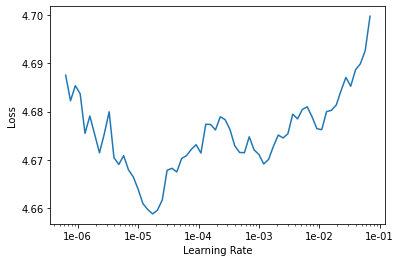

In [ ]:
learn.recorder.plot(skip_end=25,suggestions=True)

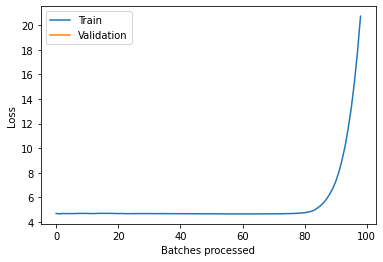

In [ ]:
learn.recorder.plot_losses()

In [ ]:
learn.fit_one_cycle(4, 5e-6, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.657713,4.545173,0.233897,21:40
1,4.677704,4.544979,0.233919,21:38
2,4.664546,4.544917,0.233932,21:35
3,4.672304,4.544884,0.233942,21:37


In [ ]:
learn.fit_one_cycle(4, 0.01, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.783433,4.613352,0.227859,47:24


In [ ]:
learn.validate(data_lm.valid_dl)

[4.1878004, tensor(0.2684)]

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


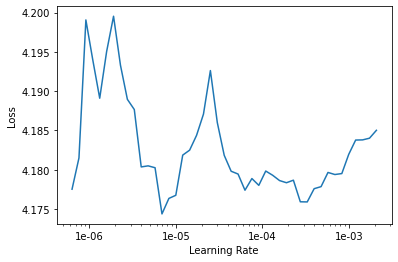

In [ ]:
learn.recorder.plot(skip_end=45)

In [ ]:
learn.fit_one_cycle(6, slice(5e-05,1e-04),moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.validate(data_lm.valid_dl)

[4.160276, tensor(0.2718)]